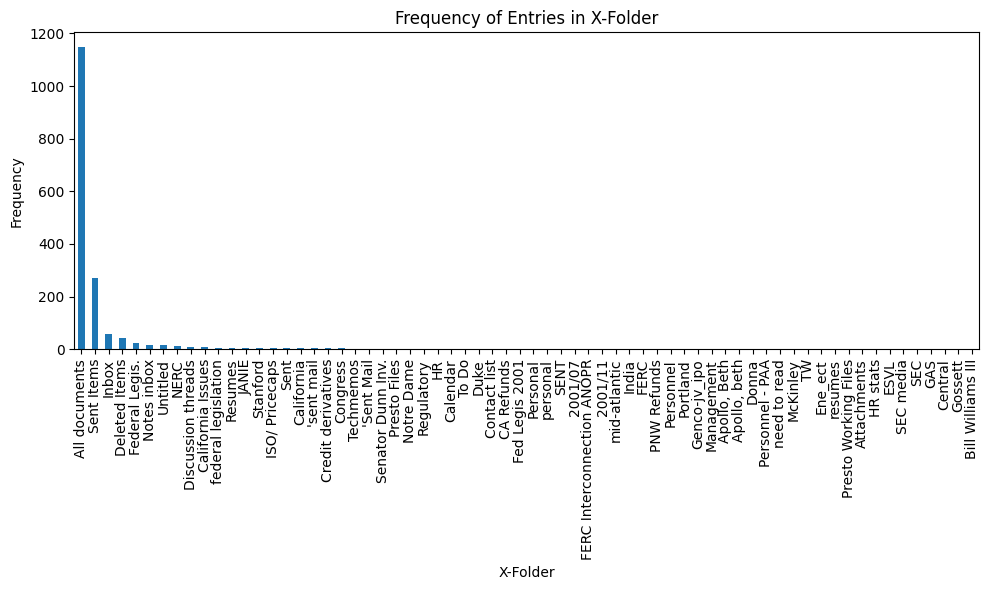

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = pd.read_csv('/content/drive/MyDrive/enron_filtered3.csv')

folder_counts = df_filtered['X-Folder'].value_counts()

plt.figure(figsize=(10, 6))
folder_counts.plot(kind='bar')

plt.xlabel('X-Folder')
plt.ylabel('Frequency')
plt.title('Frequency of Entries in X-Folder')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [69]:
relative_frequencies = df_filtered['X-Folder'].value_counts(normalize=True)

relative_frequencies_df = pd.DataFrame({
    'X-Folder': relative_frequencies.index,
    'Relative Frequency': relative_frequencies.values
})

print(relative_frequencies_df)

             X-Folder  Relative Frequency
0       All documents            0.673913
1          Sent Items            0.159224
2               Inbox            0.034665
3       Deleted Items            0.025264
4      Federal Legis.            0.012926
..                ...                 ...
61                SEC            0.000588
62                GAS            0.000588
63            Central            0.000588
64            Gossett            0.000588
65  Bill Williams III            0.000588

[66 rows x 2 columns]


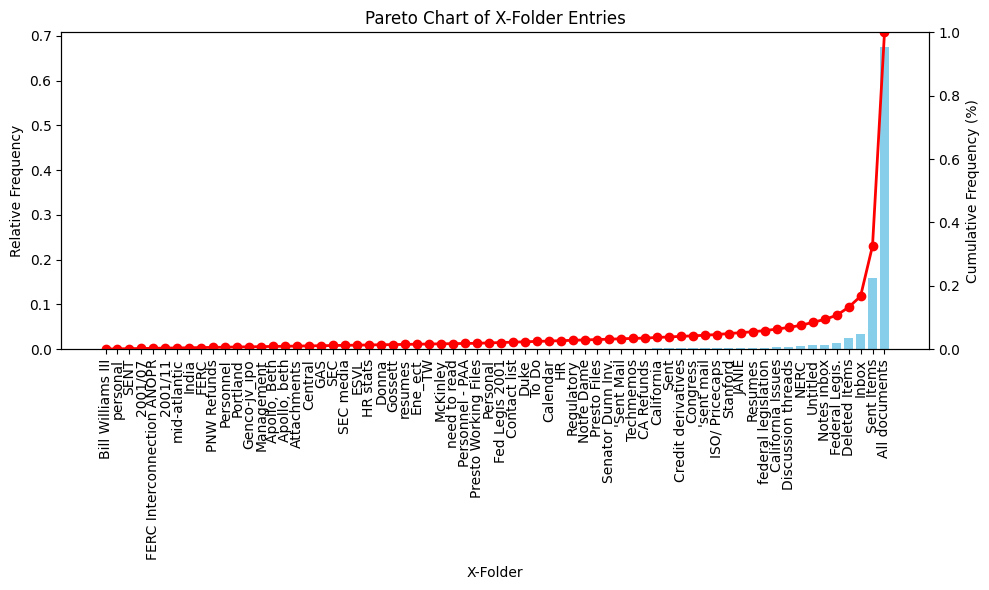

In [70]:
import matplotlib.pyplot as plt
import numpy as np

relative_frequencies_df = relative_frequencies_df.sort_values('Relative Frequency', ascending=True)

relative_frequencies_df['Cumulative Frequency'] = np.cumsum(relative_frequencies_df['Relative Frequency'])

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(relative_frequencies_df['X-Folder'], relative_frequencies_df['Relative Frequency'], color='skyblue')
ax1.set_xlabel('X-Folder')
ax1.set_ylabel('Relative Frequency')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

ax2.plot(relative_frequencies_df['X-Folder'], relative_frequencies_df['Cumulative Frequency'], color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Frequency (%)')
ax2.set_ylim(0, 1)

plt.title('Pareto Chart of X-Folder Entries')

plt.tight_layout()
plt.show()


In [71]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict, Counter
from sentence_transformers import SentenceTransformer
import pandas as pd

def cluster_and_identify_frequent_folders(df, column_name='X-Folder'):
    folder_entries = df[column_name].dropna().unique()

    model = SentenceTransformer('paraphrase-MPNet-base-v2')

    embeddings = model.encode(folder_entries)

    clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=3.5, linkage='ward')
    clustering_model.fit(embeddings)

    labels = clustering_model.labels_

    clustered_entries = defaultdict(list)
    for entry, label in zip(folder_entries, labels):
        clustered_entries[label].append(entry)

    cluster_representative = {}
    cluster_frequencies = {}
    total_entries = len(folder_entries)

    for label, entries_in_cluster in clustered_entries.items():

        entry_counts = Counter(entries_in_cluster)
        most_frequent_entry = entry_counts.most_common(1)[0][0]

        cluster_representative[label] = most_frequent_entry

        cluster_size = len(entries_in_cluster)
        cluster_frequencies[label] = (cluster_size / total_entries) * 100

    print("\nEntry to Cluster Representative Mapping:")
    for label, entries_in_cluster in clustered_entries.items():
        representative = cluster_representative[label]
        for entry in entries_in_cluster:
            print(f"{entry} -> {representative}")

    print("\nCluster Frequencies:")
    for label, freq in cluster_frequencies.items():
        print(f"Cluster {label}: {freq:.2f}% of total entries")

    entry_to_representative = {}
    for label, entries_in_cluster in clustered_entries.items():
        representative = cluster_representative[label]
        for entry in entries_in_cluster:
            entry_to_representative[entry] = representative

    df[column_name] = df[column_name].map(entry_to_representative).fillna(df[column_name])

    return df, cluster_representative, clustered_entries, cluster_frequencies


In [72]:
 df_new, c_rep, c_ent, c_feq = cluster_and_identify_frequent_folders(df_filtered)


Entry to Cluster Representative Mapping:
'sent mail -> 'sent mail
'Sent Mail -> 'sent mail
Sent Items -> Sent Items
Sent -> Sent Items
SENT -> Sent Items
All documents -> All documents
Inbox -> Inbox
Notes inbox -> Inbox
Apollo, Beth -> Apollo, Beth
Apollo, beth -> Apollo, Beth
Resumes -> Resumes
resumes -> Resumes
Donna -> Donna
Personnel - PAA -> Personnel - PAA
Personnel -> Personnel - PAA
Deleted Items -> Deleted Items
need to read -> need to read
To Do -> need to read
Discussion threads -> Discussion threads
McKinley -> McKinley
TW -> TW
Ene_ect -> Ene_ect
ESVL -> Ene_ect
Management -> Management
Regulatory -> Management
Techmemos -> Techmemos
Calendar -> Calendar
Personal -> Personal
personal -> Personal
Stanford -> Stanford
Notre Dame -> Stanford
Untitled -> Untitled
Attachments -> Attachments
California -> California
California Issues -> California
Contact list -> Contact list
federal legislation -> federal legislation
Federal Legis. -> federal legislation
Fed Legis 2001 -> fe

In [73]:
relative_frequencies = df_new['X-Folder'].value_counts(normalize=True)

relative_frequencies_df = pd.DataFrame({
    'X-Folder': relative_frequencies.index,
    'Relative Frequency': relative_frequencies.values
})

print(relative_frequencies_df)

                      X-Folder  Relative Frequency
0                All documents            0.673913
1                   Sent Items            0.161575
2                        Inbox            0.044066
3                Deleted Items            0.025264
4          federal legislation            0.017626
5                     Untitled            0.009401
6                         FERC            0.007051
7                   California            0.006463
8           Discussion threads            0.005288
9                     Stanford            0.004113
10                     Resumes            0.003525
11           Senator Dunn Inv.            0.002938
12                  'sent mail            0.002938
13                       JANIE            0.002938
14              ISO/ Pricecaps            0.002350
15                  Management            0.001763
16                    Personal            0.001763
17                  CA Refunds            0.001763
18                need to read 

In [89]:
relative_frequencies_df = relative_frequencies_df.sort_values(by=['Relative Frequency'], ascending=False)
top_n = 4
top_classes = relative_frequencies_df.head(top_n)['X-Folder']
data_new_filtered = df_new[df_new['X-Folder'].isin(top_classes)]
print(data_new_filtered)

      Unnamed: 0.1  Unnamed: 0       X-Folder  \
2                2           2     Sent Items   
3                3           3     Sent Items   
4                4           4     Sent Items   
5                5           5     Sent Items   
6                6           6  All documents   
...            ...         ...            ...   
1696          1696        1696          Inbox   
1697          1697        1697          Inbox   
1698          1698        1698  All documents   
1699          1699        1699          Inbox   
1701          1701        1701     Sent Items   

                                                content  
2     -----Original Message----- From: Hawkins, Bern...  
3     -----Original Message----- From: Perrino, Dave...  
4     -----Original Message----- From: Comnes, Alan ...  
5     Can you guys coordinate to make sure someone l...  
6     thx Jeanie Slone 12/19/2000 04:51 PM To: John ...  
...                                                 ...  
1696 

In [87]:
print(top_classes)

0    All documents
1       Sent Items
2            Inbox
3    Deleted Items
Name: X-Folder, dtype: object


In [92]:
data_new_filtered.to_csv('/content/drive/MyDrive/enron_filtered4.csv', index=False)

manually renamed X-Folder to target and content to text. The unnamed columns were also manually deleted from the csv file.